# Naive Bayes

**Dataset on Social media ads describing users, whether users have purchased a product by clicking on the advertisements shown to them.**

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df= pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
#Need to be label Encoded

from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()

df['Gender']=le.fit_transform(df['Gender'])

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [14]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## EDA

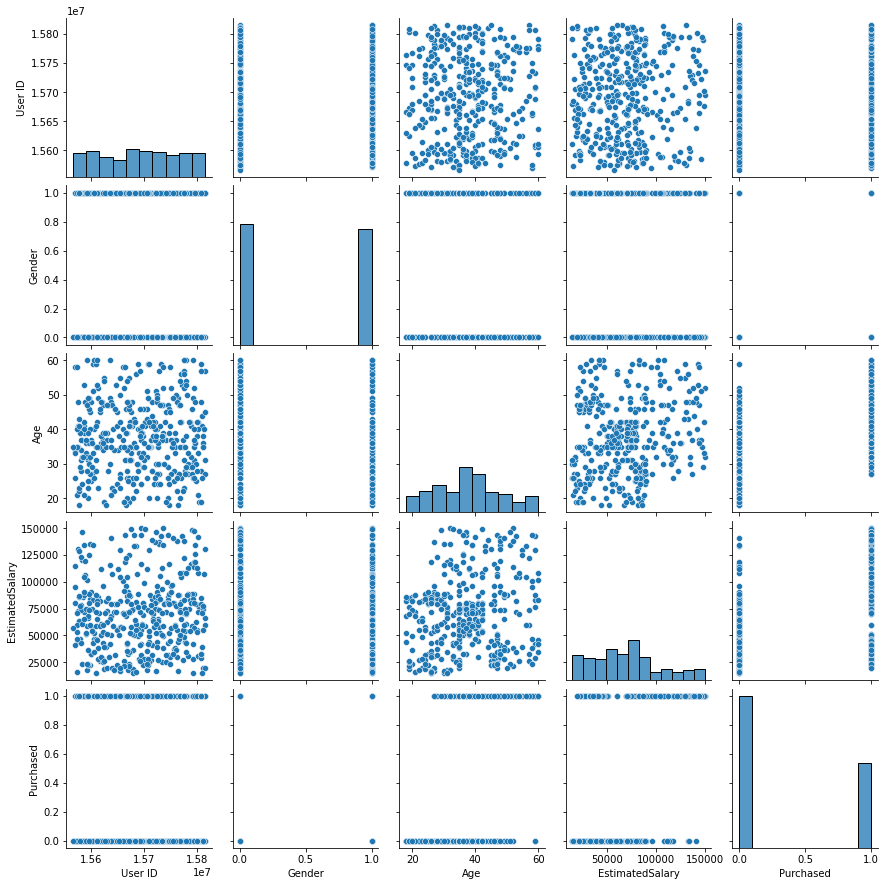

In [10]:
sns.pairplot(df)

In [18]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X= df.drop('Purchased',axis=1)
y= df["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Standardize the Variables

In [24]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train= sc.fit_transform(X_train)

X_test =sc.transform(X_test)

## Using Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

GB= GaussianNB()

GB.fit(X_train,y_train)

GaussianNB()

In [27]:
y_pred = GB.predict(X_test)

In [28]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [30]:
GB.predict_proba(X_test)

array([[9.17233793e-01, 8.27662073e-02],
       [8.27936475e-01, 1.72063525e-01],
       [8.81399827e-01, 1.18600173e-01],
       [9.24980233e-01, 7.50197672e-02],
       [8.92401171e-01, 1.07598829e-01],
       [9.69070892e-01, 3.09291081e-02],
       [9.07006308e-01, 9.29936917e-02],
       [5.70893167e-02, 9.42910683e-01],
       [9.90056440e-01, 9.94356021e-03],
       [4.90066084e-01, 5.09933916e-01],
       [9.61988308e-01, 3.80116916e-02],
       [9.67788990e-01, 3.22110102e-02],
       [8.83042556e-01, 1.16957444e-01],
       [7.44457138e-01, 2.55542862e-01],
       [9.82227487e-01, 1.77725133e-02],
       [5.39843999e-01, 4.60156001e-01],
       [8.27081968e-01, 1.72918032e-01],
       [9.85830438e-01, 1.41695622e-02],
       [3.52703387e-03, 9.96472966e-01],
       [8.86413078e-01, 1.13586922e-01],
       [8.91301493e-01, 1.08698507e-01],
       [5.84444928e-03, 9.94155551e-01],
       [7.32494943e-01, 2.67505057e-01],
       [1.48233330e-01, 8.51766670e-01],
       [9.802730

## Evaluation 

In [39]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,plot_roc_curve
print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(roc_auc_score(y_test,GB.predict_proba(X_test)[:,1]))

print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.95      0.93        79
           1       0.89      0.80      0.85        41

    accuracy                           0.90       120
   macro avg       0.90      0.88      0.89       120
weighted avg       0.90      0.90      0.90       120

[[75  4]
 [ 8 33]]
0.9580117320160544
0.9


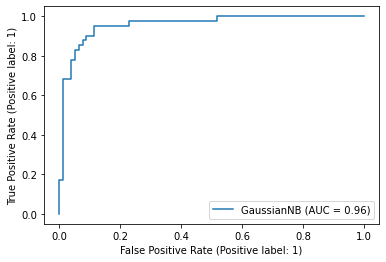

In [40]:
plot_roc_curve(GB,X_test,y_test)